# CS Research-A-Thon

## Shirley Wang
## Qiwei Shao
## Yuya Asano

# Question

Choose a language feature and a family of languages.  Determine whether the language feature is correlated with other properties of the language such as geographical information.

Could use babel.net to compare how many different meanings a word has in different languages.

In [4]:
import pandas as pd

In [5]:
redvsyellow = pd.read_excel('redvsyellow.xlsx')
redvsyellow = redvsyellow.rename(columns={'Name': 'Red and Yellow'})
redvsyellow = redvsyellow.drop(columns = ['Frequency', 'Confidence', 'References', 'Parameter'])
bluevsgreen = pd.read_excel('bluevsgreen.xlsx')
bluevsgreen = bluevsgreen.rename(columns={'Name': 'Green and Blue'})
bluevsgreen = bluevsgreen.drop(columns = ['Frequency', 'Confidence', 'References', 'Parameter', 'ID'])
basiccats = pd.read_excel('numberbasiccats.xlsx')
basiccats = basiccats.rename(columns={'Name': 'Basic Colour Categories'})
basiccats = basiccats.drop(columns = ['Frequency', 'Confidence', 'References', 'Parameter', 'ID'])
nonderived = pd.read_excel('numbernonderived.xlsx')
nonderived = nonderived.rename(columns={'Name': 'Non-Derived Basic Colour Categories'})
nonderived = nonderived.drop(columns = ['Frequency', 'Confidence', 'References', 'Parameter', 'ID'])

the closer the place is to the equator, the less basic nonderived color categories they have

In [6]:
redvsyellow.columns

Index([u'ID', u'Red and Yellow', u'Language'], dtype='object')

In [7]:
coloursdf = pd.merge(bluevsgreen, redvsyellow, on = 'Language')
coloursdf = pd.merge(coloursdf, basiccats, on = 'Language')
coloursdf = pd.merge(coloursdf, nonderived, on = 'Language')

locationdf = pd.read_table('https://wals.info/languoid.tab?sEcho=1&iSortingCols=1&iSortCol_0=0&sSortDir_0=asc')

locationdf = locationdf.rename(columns = {'name': 'Language'})
coloursdf = pd.merge(locationdf, coloursdf, on='Language', how='inner')
coloursdf = coloursdf.drop(columns=['ID', 'glottocode'])

coloursdf.head()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """
/usr/local/lib/python2.7/site-packages/pandas/core/reshape/merge.py:1662: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


,wals code,Language,latitude,longitude,macroarea,genus,family,sample 100,sample 200,Green and Blue,Red and Yellow,Basic Colour Categories,Non-Derived Basic Colour Categories
0,oca,Ocaina,-2.750000,-71.750000,South America,Huitoto,Huitotoan,False,False,Green/blue,Red vs. yellow,6-6.5,5.0
1,brk,Berik,-2.250000,138.833333,Papunesia,Tor,Tor-Orya,False,False,Green/blue,Red vs. yellow,4.5-5.5,5.0
2,amk,Amarakaeri,-12.500000,-70.500000,South America,Harakmbet,Harakmbet,False,False,Green/blue,Red vs. yellow,6-6.5,5.5
3,chy,Chayahuita,-5.500000,-77.000000,South America,Cahuapanan,Cahuapanan,False,False,Green/blue,Red vs. yellow,6-6.5,5.0
4,agc,Agta (Central),17.966667,121.833333,Papunesia,Greater Central Philippine,Austronesian,False,False,Green/blue,Red vs. yellow,6-6.5,5.0


In [8]:
coloursdf["family"].nunique()

46

In [9]:
coloursdf['family'].value_counts()

Indo-European        10
Niger-Congo          10
Trans-New Guinea      8
Austronesian          7
Oto-Manguean          5
other                 4
Chibchan              4
Uto-Aztecan           4
Mayan                 3
Barbacoan             3
Pama-Nyungan          3
Eastern Sudanic       2
Sepik                 2
Algic                 2
Arawakan              2
Tacanan               2
Afro-Asiatic          2
Panoan                2
Ticuna                1
Candoshi              1
Harakmbet             1
Mande                 1
Na-Dene               1
Tor-Orya              1
Hokan                 1
Tucanoan              1
Sentani               1
Huitotoan             1
Southern Daly         1
Chiquito              1
Teberan-Pawaian       1
Waorani               1
Guahiban              1
Japanese              1
Eskimo-Aleut          1
Zaparoan              1
Korean                1
Muskogean             1
Tol                   1
Cahuapanan            1
Arauan                1
Sino-Tibetan    

In [10]:
coloursdf.groupby('family').filter(lambda x: len(x) > 4).groupby('family')['Basic Colour Categories'].value_counts()

family            Basic Colour Categories
Austronesian      6-6.5                      4
                  4.5-5.5                    2
                  11                         1
Indo-European     11                         5
                  7-7.5                      3
                  4.5-5.5                    1
                  6-6.5                      1
Niger-Congo       3-4                        6
                  6-6.5                      2
                  4.5-5.5                    1
                  7-7.5                      1
Oto-Manguean      8-8.5                      2
                  6-6.5                      1
                  7-7.5                      1
                  9-10                       1
Trans-New Guinea  4.5-5.5                    3
                  6-6.5                      3
                  3-4                        1
                  7-7.5                      1
Name: Basic Colour Categories, dtype: int64

In [11]:
coloursdf.groupby('family').filter(lambda x: len(x) > 4).groupby('family')['Green and Blue'].value_counts()

family            Green and Blue      
Austronesian      Green/blue              5
                  Black/blue vs. green    1
                  Green vs. blue          1
Indo-European     Green vs. blue          6
                  Green/blue              4
Niger-Congo       Black/green/blue        7
                  Green vs. blue          2
                  Green/blue              1
Oto-Manguean      Green/blue              3
                  Green vs. blue          2
Trans-New Guinea  Green/blue              6
                  Black/green/blue        1
                  Green vs. blue          1
Name: Green and Blue, dtype: int64

In [12]:
coloursdf.groupby('family').filter(lambda x: len(x) > 4).groupby('family')['Red and Yellow'].value_counts()

family            Red and Yellow
Austronesian      Red vs. yellow     7
Indo-European     Red vs. yellow    10
Niger-Congo       Red/yellow         6
                  Red vs. yellow     4
Oto-Manguean      Red vs. yellow     5
Trans-New Guinea  Red vs. yellow     8
Name: Red and Yellow, dtype: int64

In [13]:
coloursdf['Basic Colour Categories'].value_counts()

6-6.5      31
4.5-5.5    23
3-4        15
7-7.5      12
11         11
8-8.5       6
9-10        5
Name: Basic Colour Categories, dtype: int64

In [14]:
coloursdf[coloursdf['Basic Colour Categories'] == '4.5-5.5'].groupby('Basic Colour Categories')['Green and Blue'].value_counts()

Basic Colour Categories  Green and Blue       
4.5-5.5                  Green/blue               18
                         Black/blue vs. green      2
                         Black/green/blue          1
                         Green vs. blue            1
                         Yellow/green vs. blue     1
Name: Green and Blue, dtype: int64

In [15]:
coloursdf[coloursdf['Basic Colour Categories'] == '4.5-5.5'].groupby('Basic Colour Categories')['Red and Yellow'].value_counts()

Basic Colour Categories  Red and Yellow      
4.5-5.5                  Red vs. yellow          19
                         Red/yellow               3
                         Yellow/green vs. red     1
Name: Red and Yellow, dtype: int64

In [16]:
coloursdf[coloursdf['Red and Yellow'] == 'Red/yellow'].groupby('Red and Yellow')['family'].value_counts()

Red and Yellow  family     
Red/yellow      Niger-Congo    6
                Arawakan       1
                Mande          1
                Tacanan        1
                Tucanoan       1
                Uto-Aztecan    1
Name: family, dtype: int64

In [17]:
coloursdf.groupby('Basic Colour Categories')['Red and Yellow'].value_counts()

Basic Colour Categories  Red and Yellow           
11                       Red vs. yellow               11
3-4                      Red/yellow                    7
                         None                          3
                         Red vs. yellow                3
                         Yellow/green/blue vs. red     2
4.5-5.5                  Red vs. yellow               19
                         Red/yellow                    3
                         Yellow/green vs. red          1
6-6.5                    Red vs. yellow               30
                         Red/yellow                    1
7-7.5                    Red vs. yellow               12
8-8.5                    Red vs. yellow                6
9-10                     Red vs. yellow                5
Name: Red and Yellow, dtype: int64

In [18]:
coloursdf.groupby('Basic Colour Categories')['Green and Blue'].value_counts()

Basic Colour Categories  Green and Blue       
11                       Green vs. blue           11
3-4                      Black/green/blue         11
                         None                      2
                         Green/blue                1
                         Yellow/green/blue         1
4.5-5.5                  Green/blue               18
                         Black/blue vs. green      2
                         Black/green/blue          1
                         Green vs. blue            1
                         Yellow/green vs. blue     1
6-6.5                    Green/blue               26
                         Green vs. blue            4
                         Black/green/blue          1
7-7.5                    Green/blue                8
                         Green vs. blue            4
8-8.5                    Green vs. blue            3
                         Green/blue                3
9-10                     Green vs. blue            4

In [19]:
coloursdf['genus'].value_counts()

Indic                         5
Gur                           5
Creoles and Pidgins           4
Oceanic                       3
Mayan                         3
Angan                         3
Barbacoan                     3
Germanic                      2
Western Pama-Nyungan          2
Tacanan                       2
Bantoid                       2
Eastern Highlands             2
Algonquian                    2
Kwa                           2
Surmic                        2
Romance                       2
Tarahumaran                   2
Panoan                        2
Sama-Bajaw                    1
Aztecan                       1
Kwerba                        1
Slavic                        1
Subtiaba-Tlapanec             1
Guaymiic                      1
Zaparoan                      1
Huavean                       1
Sepik Hill                    1
Korean                        1
Muskogean                     1
Cahuapanan                    1
                             ..
Athapask

In [20]:
coloursdf.groupby('family')['Red and Yellow'].value_counts()

family             Red and Yellow           
Afro-Asiatic       Red vs. yellow                1
                   Yellow/green/blue vs. red     1
Algic              Red vs. yellow                1
                   Yellow/green vs. red          1
Arauan             Yellow/green/blue vs. red     1
Arawakan           Red vs. yellow                1
                   Red/yellow                    1
Austronesian       Red vs. yellow                7
Barbacoan          Red vs. yellow                3
Cahuapanan         Red vs. yellow                1
Candoshi           Red vs. yellow                1
Chibchan           Red vs. yellow                4
Chiquito           Red vs. yellow                1
East Geelvink Bay  Red vs. yellow                1
Eastern Sudanic    Red vs. yellow                2
Eskimo-Aleut       Red vs. yellow                1
Guahiban           Red vs. yellow                1
Harakmbet          Red vs. yellow                1
Hokan              Red vs. yellow    

In [21]:
uncommonCon = pd.read_excel('uncommonConsonants.xlsx')

In [22]:
uncommonCon.head()

,ID,Name,Parameter,Language,Frequency,Confidence,References
0,19A-abi,None,Presence of Uncommon Consonants,Abipón,NaN,NaN,Najlis 1966
1,19A-abk,Pharyngeals,Presence of Uncommon Consonants,Abkhaz,NaN,NaN,Hewitt 1979
2,19A-ach,None,Presence of Uncommon Consonants,Aché,NaN,NaN,Susnik 1974
3,19A-acm,None,Presence of Uncommon Consonants,Achumawi,NaN,NaN,Olmsted 1966;Olmsted 1964
4,19A-aco,'Th' sounds,Presence of Uncommon Consonants,Acoma,NaN,NaN,Miller 1966


In [23]:
uncommonCon= uncommonCon.drop(columns = ['Frequency', 'Confidence', 'References', 'Parameter', 'ID'])

In [24]:
colourConsonants = pd.merge(coloursdf, uncommonCon, on = 'Language')

In [25]:
colourConsonants = colourConsonants.drop(columns = ['sample 100', 'sample 200'])
colourConsonants = colourConsonants.rename(columns={'Name': 'Uncommon Consonants'})

In [26]:
colourConsonants

,wals code,Language,latitude,longitude,macroarea,genus,family,Green and Blue,Red and Yellow,Basic Colour Categories,Non-Derived Basic Colour Categories,Uncommon Consonants
0,oca,Ocaina,-2.750000,-71.750000,South America,Huitoto,Huitotoan,Green/blue,Red vs. yellow,6-6.5,5.0,None
1,ghb,Guahibo,5.000000,-69.000000,South America,Guahiban,Guahiban,Green/blue,Red vs. yellow,6-6.5,5.0,None
2,mnd,Mandarin,34.000000,110.000000,Eurasia,Chinese,Sino-Tibetan,Green vs. blue,Red vs. yellow,8-8.5,6.0,None
3,kya,Kuku-Yalanji,-16.000000,145.000000,Australia,Northern Pama-Nyungan,Pama-Nyungan,None,None,3-4,3.0,None
4,ant,Angaatiha,-7.216667,146.250000,Papunesia,Angan,Trans-New Guinea,Green vs. blue,Red vs. yellow,7-7.5,5.0,None
5,tic,Ticuna,-4.000000,-70.500000,South America,Ticuna,Ticuna,Green/blue,Red vs. yellow,6-6.5,5.0,None
6,pec,Pech,15.000000,-85.500000,North America,Paya,Chibchan,Green/blue,Red vs. yellow,4.5-5.5,5.0,None
7,wao,Waorani,-1.000000,-76.500000,South America,Waorani,Waorani,Green/blue,None,3-4,4.0,None
8,nhn,Nahuatl (North Puebla),20.000000,-98.250000,North America,Aztecan,Uto-Aztecan,Green vs. blue,Red vs. yellow,8-8.5,6.0,None
9,ood,O'odham,32.000000,-112.000000,North America,Tepiman,Uto-Aztecan,Green/blue,Red vs. yellow,8-8.5,5.0,None


In [27]:
colourConsonants.groupby('Uncommon Consonants')['Green and Blue'].value_counts()

Uncommon Consonants  Green and Blue  
'Th' sounds          Green vs. blue       3
                     Green/blue           3
Labial-velars        Black/green/blue     2
None                 Green/blue          17
                     Green vs. blue      12
                     None                 2
                     Black/green/blue     1
Name: Green and Blue, dtype: int64

In [28]:
colourConsonants.groupby('Uncommon Consonants')['Red and Yellow'].value_counts()

Uncommon Consonants  Red and Yellow
'Th' sounds          Red vs. yellow     5
                     Red/yellow         1
Labial-velars        Red/yellow         2
None                 Red vs. yellow    28
                     None               3
                     Red/yellow         1
Name: Red and Yellow, dtype: int64

In [29]:
numbers = pd.read_excel('numbers.xlsx')

In [30]:
numbers.head()

,ID,Name,Parameter,Language,Frequency,Confidence,References
0,55A-abk,Absent,Numeral Classifiers,Abkhaz,NaN,NaN,NaN
1,55A-abu,Obligatory,Numeral Classifiers,Abun,NaN,NaN,Berry and Berry 1999
2,55A-aco,Absent,Numeral Classifiers,Acoma,NaN,NaN,Nichols 1992
3,55A-ain,Optional,Numeral Classifiers,Ainu,NaN,NaN,Nichols 1992;Refsing 1986
4,55A-agw,Absent,Numeral Classifiers,Alagwa,NaN,NaN,NaN


In [31]:
numbers = numbers.drop(columns = ['Frequency', 'Confidence', 'References', 'Parameter', 'ID'])

In [32]:
colourNums = pd.merge(coloursdf, numbers, on = 'Language')

In [33]:
colourNums = colourNums.drop(columns = ['sample 100', 'sample 200'])
colourNums = colourNums.rename(columns={'Name': 'Number Classifier'})

In [34]:
colourNums

,wals code,Language,latitude,longitude,macroarea,genus,family,Green and Blue,Red and Yellow,Basic Colour Categories,Non-Derived Basic Colour Categories,Number Classifier
0,oca,Ocaina,-2.750000,-71.750000,South America,Huitoto,Huitotoan,Green/blue,Red vs. yellow,6-6.5,5.0,Optional
1,amk,Amarakaeri,-12.500000,-70.500000,South America,Harakmbet,Harakmbet,Green/blue,Red vs. yellow,6-6.5,5.5,Absent
2,chy,Chayahuita,-5.500000,-77.000000,South America,Cahuapanan,Cahuapanan,Green/blue,Red vs. yellow,6-6.5,5.0,Optional
3,mnd,Mandarin,34.000000,110.000000,Eurasia,Chinese,Sino-Tibetan,Green vs. blue,Red vs. yellow,8-8.5,6.0,Obligatory
4,wao,Waorani,-1.000000,-76.500000,South America,Waorani,Waorani,Green/blue,None,3-4,4.0,Obligatory
5,ood,O'odham,32.000000,-112.000000,North America,Tepiman,Uto-Aztecan,Green/blue,Red vs. yellow,8-8.5,5.0,Absent
6,cul,Culina,-6.000000,-70.500000,South America,Arauan,Arauan,Black/green/blue,Yellow/green/blue vs. red,3-4,4.0,Absent
7,eng,English,52.000000,0.000000,Eurasia,Germanic,Indo-European,Green vs. blue,Red vs. yellow,11,6.0,Absent
8,fre,French,48.000000,2.000000,Eurasia,Romance,Indo-European,Green vs. blue,Red vs. yellow,11,6.0,Absent
9,kor,Korean,37.500000,128.000000,Eurasia,Korean,Korean,Green vs. blue,Red vs. yellow,11,6.0,Obligatory


In [35]:
colourNums.groupby('Number Classifier')['Green and Blue'].value_counts()

Number Classifier  Green and Blue  
Absent             Green vs. blue      5
                   Green/blue          5
                   Black/green/blue    1
Obligatory         Green vs. blue      3
                   Green/blue          2
Optional           Green/blue          3
Name: Green and Blue, dtype: int64

In [36]:
colourNums.groupby('Number Classifier')['Red and Yellow'].value_counts()

Number Classifier  Red and Yellow           
Absent             Red vs. yellow               10
                   Yellow/green/blue vs. red     1
Obligatory         Red vs. yellow                4
                   None                          1
Optional           Red vs. yellow                2
                   Red/yellow                    1
Name: Red and Yellow, dtype: int64

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

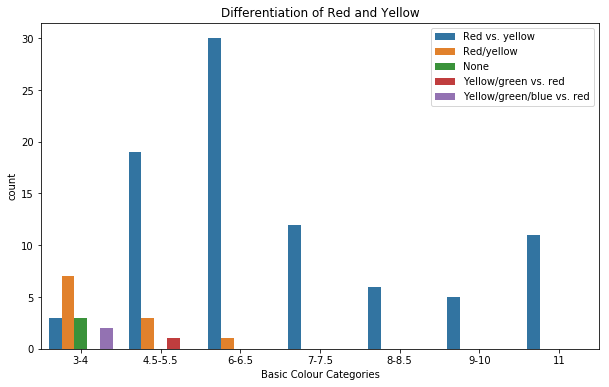

In [39]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.countplot(x='Basic Colour Categories', hue='Red and Yellow', data=coloursdf, \
              order=['3-4', '4.5-5.5', '6-6.5', '7-7.5', '8-8.5', '9-10', '11'], \
              hue_order=['Red vs. yellow', 'Red/yellow', 'None', 'Yellow/green vs. red', 'Yellow/green/blue vs. red'])
axs.set_title("Differentiation of Red and Yellow")
axs.legend(loc='upper right')
plt.show()

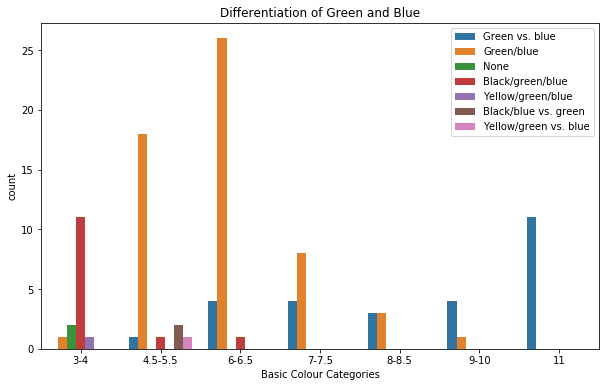

In [40]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.countplot(x='Basic Colour Categories', hue='Green and Blue', data=coloursdf, \
              order=['3-4', '4.5-5.5', '6-6.5', '7-7.5', '8-8.5', '9-10', '11'], \
             hue_order=['Green vs. blue', 'Green/blue', 'None', 'Black/green/blue', 'Yellow/green/blue', 'Black/blue vs. green', 'Yellow/green vs. blue'])
axs.set_title("Differentiation of Green and Blue")
axs.legend(loc='upper right')
plt.show()